<a href="https://colab.research.google.com/github/minh071289/MachineLearning/blob/main/uet_ml_05_optimization_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import tqdm

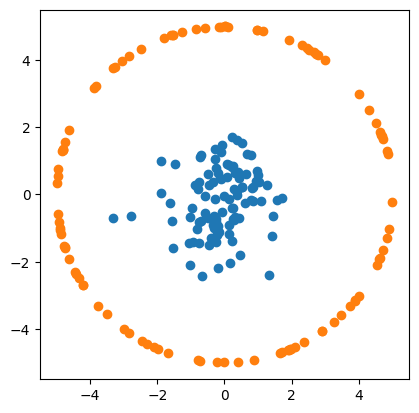

torch.Size([200, 2])
torch.Size([200, 1])


In [ ]:
x_inside = torch.randn((100, 2))
angles = (2 * torch.rand((100, 1))) * torch.pi
x_outside = torch.cat([torch.sin(angles), torch.cos(angles)],
                      dim=1) * 5

fig, ax = plt.subplots(1, 1)
ax.scatter(x_inside[:, 0], x_inside[:, 1])
ax.scatter(x_outside[:, 0], x_outside[:, 1])
ax.set_aspect('equal')
plt.show()

x_train = torch.cat([x_inside, x_outside])
y_train = torch.cat([torch.zeros(100, 1), torch.ones(100, 1)])

print(x_train.size())
print(y_train.size())

# Problem definition
Given the above dataset, create a neural network classifier that classify the
dataset. Visualize the classification result, the loss function during training.
Show the results for 3 different optimizer: SGD, SGD + Momentum, and Adam.

In [ ]:
def train(net, x_train, y_train, lr, nepochs, optimizer="sgd", **kwargs):
    if optimizer == 'sgd':
        optimizer = optim.SGD(net.parameters(), lr=lr)
    elif optimizer == 'momentum':
        optimizer = optim.SGD(net.parameters(), lr=lr, momentum=kwargs["momentum"])
    elif optimizer == 'adam':
        optimizer = optim.Adam(net.parameters(), lr=lr, betas=kwargs["betas"])

    net.to("cuda:0")
    x_train = x_train.to("cuda:0")
    y_train = y_train.to("cuda:0")

    losses = []
    for epoch in tqdm.trange(nepochs):
        optimizer.zero_grad()
        y_pred = net(x_train)
        loss = nn.BCELoss()(y_pred, y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    net.to("cpu")
    x_train.to("cpu")
    y_train.to("cpu")

    return net, losses


In [ ]:
lr = 1e-2
nepochs = 3000
optimizer = 'adam'
nhidden = 2

net = nn.Sequential(
    nn.Linear(2, nhidden),
    nn.LeakyReLU(),
    nn.Linear(nhidden, nhidden),
    nn.LeakyReLU(),
    nn.Linear(nhidden, 1),
    nn.Sigmoid()
)

net, losses = train(net=net, x_train=x_train, y_train=y_train, lr=lr, nepochs=nepochs, optimizer=optimizer, betas=(0.9, 0.999))

100%|██████████| 3000/3000 [00:04<00:00, 615.58it/s]


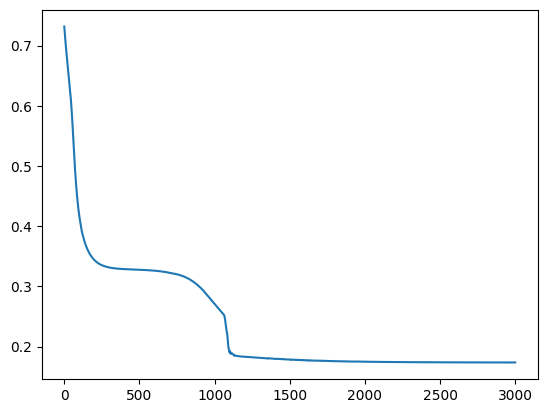

In [ ]:
plt.plot(losses)

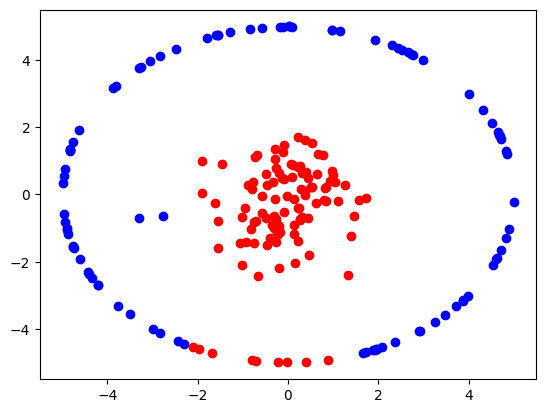

In [ ]:
y_pred = net(x_train)
y_pos = (y_pred > 0.5).squeeze().cpu().detach()
y_neg = (y_pred < 0.5).squeeze().cpu().detach()

plt.scatter(x_train[y_pos, 0], x_train[y_pos, 1], c='b')
plt.scatter(x_train[y_neg, 0], x_train[y_neg, 1], c='r')

IndexError: tensors used as indices must be long, int, byte or bool tensors